In [140]:
#  Git link: https://github.com/dayanaviana/WGU/tree/main/D209-Task1 

In [141]:
from platform import python_version
("Pyhton version:", python_version())

('Pyhton version:', '3.13.2')

## Imports

In [142]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from PyUtils import MyPyUtils as utils
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor # Import Decision Tree 
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation eg:confusion_matrix, classification_report, roc_auc_score, mean_squared_error



In [143]:
filePath = "churn_0_Raw.csv"
df = pd.read_csv(filePath, index_col=False)
utils.writeDFToFile(df, "df_info_0_Raw.txt")
print("DF Shape (Rows,Columns)=", df.shape)


Complete details in df_info_0_Raw.txt file
DF Shape (Rows,Columns)= (10000, 50)


# Remove features
High-dimensional data can lead to performance issues and reduce the effectiveness of distance measures (curse of dimensionality).

In [144]:
# Remove data that is too granular
df = df.drop(columns=['CaseOrder','Customer_id', 'Interaction', 'UID', 'City', 'State', 
       'County', 'Zip', 'Lat', 'Lng', 'TimeZone', 'Job', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'])
print("DF Shape (Rows,Columns)=", df.shape)

DF Shape (Rows,Columns)= (10000, 30)


# Handling Missing Values
KNN is sensitive to missing data because distance calculations require complete data.

In [145]:
def checkMisisngValues():
    nullseries = df.isna().sum().sort_values()
    print("\n Null Values: ", (nullseries[nullseries > 0]))
checkMisisngValues()


 Null Values:  InternetService    2129
dtype: int64


In [146]:
print("InternetService=",df['InternetService'].unique())
df['InternetService'].describe(include='object')

InternetService= ['Fiber Optic' 'DSL' nan]


count            7871
unique              2
top       Fiber Optic
freq             4408
Name: InternetService, dtype: object

In [147]:
#Input missing values using the most frequent category (mode)
df['InternetService'].fillna(df['InternetService'].mode()[0], inplace=True)

utils.writeDFToFile(df, "df_info_1_NoMissingValues.txt")

checkMisisngValues()


Complete details in df_info_1_NoMissingValues.txt file

 Null Values:  Series([], dtype: int64)


/var/folders/9f/8tw205ns3136cylcf2160v6c0000gn/T/ipykernel_95310/1463085296.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['InternetService'].fillna(df['InternetService'].mode()[0], inplace=True)


# Data Encoding | One Hot Encoder
## Convert Categorical into binary

In Linear and Logistic regression this causes multicollinearity problems, so we ommit one dummy, and it can be inferred from the combination of the other values. KNN and other methods do not have this issue. (drop_first=False)

In [148]:
# Select Categorical Features
categorical_features = df.select_dtypes(include=['object']).columns.to_list()
print("\ncategorical_feature: qnt_categories")
for column_name in categorical_features:
    print(column_name,":", df[column_name].nunique())
print("\n")


categorical_feature: qnt_categories
Area : 3
Marital : 5
Gender : 3
Churn : 2
Techie : 2
Contract : 3
Port_modem : 2
Tablet : 2
InternetService : 2
Phone : 2
Multiple : 2
OnlineSecurity : 2
OnlineBackup : 2
DeviceProtection : 2
TechSupport : 2
StreamingTV : 2
StreamingMovies : 2
PaperlessBilling : 2
PaymentMethod : 4




In [149]:
df = pd.get_dummies(data=df, columns=categorical_features, drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Population                             10000 non-null  int64  
 1   Children                               10000 non-null  int64  
 2   Age                                    10000 non-null  int64  
 3   Income                                 10000 non-null  float64
 4   Outage_sec_perweek                     10000 non-null  float64
 5   Email                                  10000 non-null  int64  
 6   Contacts                               10000 non-null  int64  
 7   Yearly_equip_failure                   10000 non-null  int64  
 8   Tenure                                 10000 non-null  float64
 9   MonthlyCharge                          10000 non-null  float64
 10  Bandwidth_GB_Year                      10000 non-null  float64
 11  Are

In [150]:
print(df.columns)

Index(['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Area_Suburban', 'Area_Urban', 'Marital_Married',
       'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed',
       'Gender_Male', 'Gender_Nonbinary', 'Churn_Yes', 'Techie_Yes',
       'Contract_One year', 'Contract_Two Year', 'Port_modem_Yes',
       'Tablet_Yes', 'InternetService_Fiber Optic', 'Phone_Yes',
       'Multiple_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit Card (automatic)',
       'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check'],
      dtype='object')


# Fix Data Types
Change bool type to int64 -> True/False -> 1/0

In [151]:
bool_columns_array = df.select_dtypes(include=['bool']).columns.to_list()
print(bool_columns_array)

for item in bool_columns_array:
    # convert Dtype from 'bool' to 'int64'
    df[item] = df[item].astype('int64')

print("\n")
df.info()
utils.writeDFToFile(df, "df_info_2_Transformed.txt")
df.to_csv('churn_2_Transformed.csv')

# Clear variables
del bool_columns_array, item


['Area_Suburban', 'Area_Urban', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 'Gender_Nonbinary', 'Churn_Yes', 'Techie_Yes', 'Contract_One year', 'Contract_Two Year', 'Port_modem_Yes', 'Tablet_Yes', 'InternetService_Fiber Optic', 'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'PaperlessBilling_Yes', 'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Population                             10000 non-null  int64  
 1   Children                               10000 non-null  int64  
 2   Age                                    10000 

# Data Exploration



MonthlyCharge
Max: 290.160419
Min: 79.97886
Mean: 172.62
Median: 167.48
Mode: 179.9476
Variance: 1843.92
St. Dev: 42.94

MonthlyCharge


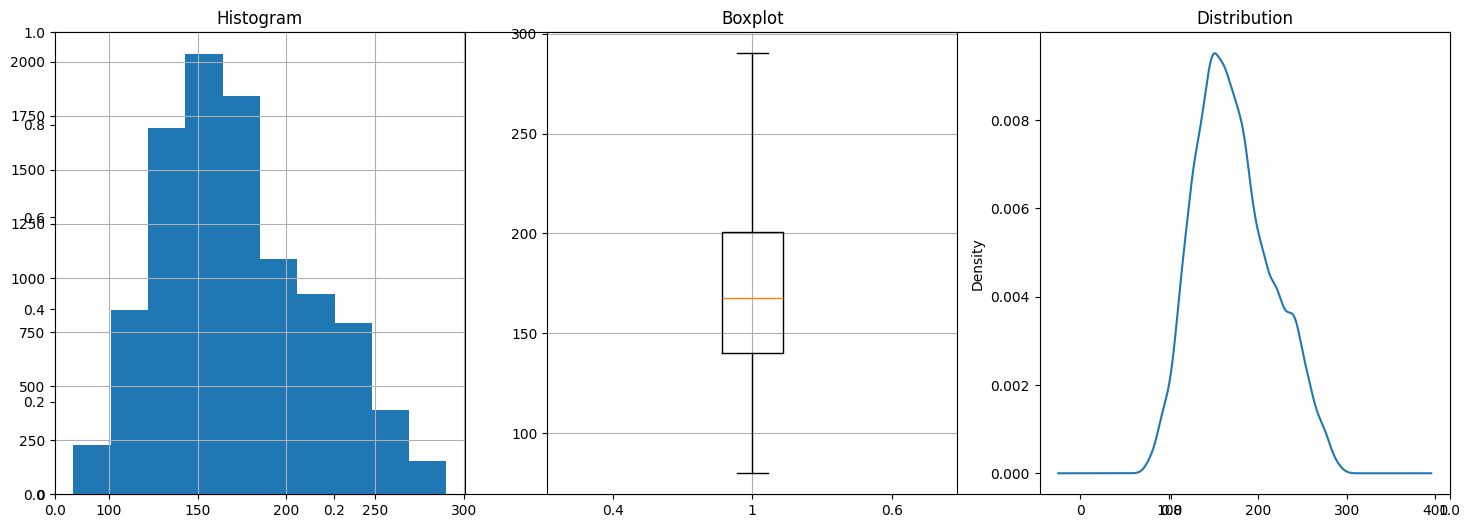

Shapiro-Wilk test:  ShapiroResult(statistic=np.float64(0.9796368809681157), pvalue=np.float64(2.0144068431484619e-35))
NORMAL Distribution


Bandwidth_GB_Year
Max: 7158.98153
Min: 155.5067148
Mean: 3392.34
Median: 3279.54
Mode: 155.5067148
Variance: 4775036.04
St. Dev: 2185.19

Bandwidth_GB_Year


/Users/dayanaviana/Documents/CodeProjects/WGU/.venv/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


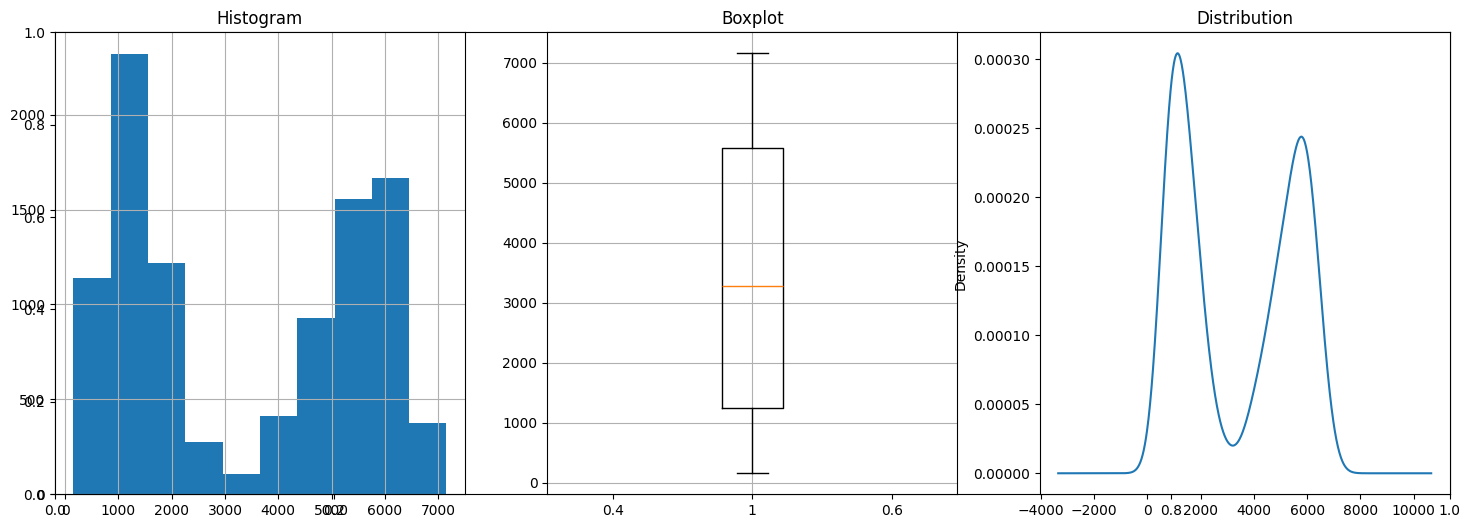

Shapiro-Wilk test:  ShapiroResult(statistic=np.float64(0.8582521673022064), pvalue=np.float64(2.509653610641483e-69))
Not certain of normality


/Users/dayanaviana/Documents/CodeProjects/WGU/.venv/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


In [152]:
from scipy import stats
import matplotlib.pyplot as plt 

columns_array = ["MonthlyCharge", 
                 "Bandwidth_GB_Year"]

for column_name in columns_array:
  print("\n")
  print(column_name)
  sample = df[column_name]
  max = np.max(sample)
  print("Max:", max)
  min = np.min(sample)
  print("Min:", min)
  mean = "{:.2f}".format(np.mean(sample))
  print("Mean:", mean)
  median =  "{:.2f}".format(np.median(sample))
  print("Median:", median)

  # Python 3.8
  # import statistics
  # mode =  statistics.multimode(sample)
  mode =  stats.mode(sample)
  print("Mode:", mode[0])
  
  var =  "{:.2f}".format(np.var(sample))
  print("Variance:", var)
  stddev =  "{:.2f}".format(np.std(sample))
  print("St. Dev:", stddev)


  print("\n" + column_name)
  # Histogram, Boxplot and density plot 
  # Plot size: 1900px x 800px
  plt.subplots(figsize=(18, 6))

  # configure supplot(nrows,ncols,nsubplots) 
  plt.subplot(1,3,1) 
  plt.grid(True)
  plt.title("Histogram")
  plt.hist(sample) 

  plt.subplot(1,3,2) 
  plt.grid(True)
  plt.title("Boxplot")
  plt.boxplot(sample) 
  
  plt.subplot(1,3,3) 
  plt.grid(True)
  plt.title("Distribution")
  sample.plot.density()

  plt.show() 

  # Test normality -> Run Shapiro-Wilk test
  testResult = stats.shapiro(sample)
  statistic, pvalue = testResult
  print("Shapiro-Wilk test: ", testResult)
  if(pvalue < 0.05 and statistic > 0.95):
    print("NORMAL Distribution")
  else:
    print("Not certain of normality")

# Scatterplot

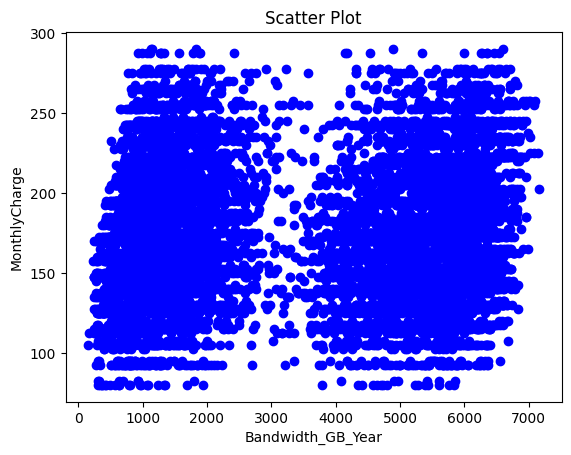

In [153]:
x = df['MonthlyCharge']
y = df['Bandwidth_GB_Year']
plt.title('Scatter Plot')
plt.scatter(y, x, color='blue')
plt.xlabel(y.name)
plt.ylabel(x.name)
plt.show()

# Sampling Data

In [154]:
def sample_data(df):
    # 80% Trainig sample , 30% Test sample
    target = 'MonthlyCharge'
    Y = df[target] #target
    X = df.drop(target, axis=1) #Predictors
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
    print('x_train:', x_train.shape)
    print('y_train:', y_train.shape)
    print('x_test:', x_test.shape)
    print('y_test:', y_test.shape)
    return X, Y, x_train, x_test, y_train, y_test
X, Y, x_train, x_test, y_train, y_test = sample_data(df)

x_train: (7000, 37)
y_train: (7000,)
x_test: (3000, 37)
y_test: (3000,)


# Build Tree Model

In [155]:
def build_tree_model(x_train, x_test, y_train, y_test):
    # Create Decision Tree classifer object
    regressor = DecisionTreeRegressor(max_depth= 4, 
                                 ccp_alpha=0.05,
                                 random_state=42)

    # Train Decision Tree Classifer
    regressor = regressor.fit(x_train,y_train)

    #Predict the response for test dataset
    y_predicted = regressor.predict(x_test)

    mse = metrics.mean_squared_error(y_test, y_predicted)
    print(f"Mean Squared Error: {mse:.4f}")

    return regressor, y_predicted
regressor, y_predicted = build_tree_model(x_train, x_test, y_train, y_test)

Mean Squared Error: 247.9619


{ccp_alpha': Non-negative float, default=0.0 (Complexity param for cost-complexity pruning)

 'class_weight': default=None (in case we have one feature that is more important)

 'criterion': {'absolute_error', 'squared_error', 'poisson', 'friedman_mse'}

 'splitter': 'best' or 'random'

 'max_depth': int, default=None,

 'min_samples_split': int or float, default=2,

 'min_samples_leaf': int or float, default=1,

 'max_features': default=None,

 'random_state': default=None,

 'max_leaf_nodes': None,

 'min_impurity_decrease': 0.0,

 'min_weight_fraction_leaf': 0.0,
 
 'monotonic_cst': None,
 '
 }

In [156]:
regressor.get_params()

{'ccp_alpha': 0.05,
 'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

## Features Importance

In [157]:
feature_names = X.columns
feature_importance = pd.DataFrame(clf.feature_importances_, index=feature_names, columns=['importance'])
feature_importance = feature_importance.sort_values ('importance', ascending=False)
feature_importance

,importance
Bandwidth_GB_Year,0.996845
InternetService_Fiber Optic,0.003155
OnlineBackup_Yes,0.000000
Contract_Two Year,0.000000
Port_modem_Yes,0.000000
Tablet_Yes,0.000000
Phone_Yes,0.000000
Multiple_Yes,0.000000
OnlineSecurity_Yes,0.000000
Population,0.000000


In [158]:
features = list(feature_importance[feature_importance['importance']>0.00].index)
features

['Bandwidth_GB_Year', 'InternetService_Fiber Optic']

<Axes: >

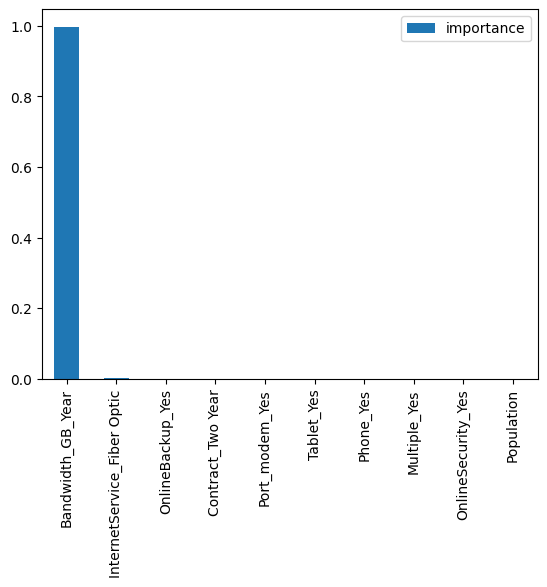

In [159]:
feature_importance.head(10).plot(kind='bar')

# Keep only most relevant features

In [160]:
df_filtered = df[['MonthlyCharge', 'Bandwidth_GB_Year', 'InternetService_Fiber Optic']]
print("DF Shape (Rows,Columns)=", df_filtered.shape)

DF Shape (Rows,Columns)= (10000, 3)


# Re-run model

In [161]:
X, Y, x_train, x_test, y_train, y_test = sample_data(df_filtered)
regressor_1, y_predicted = build_tree_model(x_train, x_test, y_train, y_test)

x_train: (7000, 2)
y_train: (7000,)
x_test: (3000, 2)
y_test: (3000,)
Mean Squared Error: 1703.4267


# Show tree

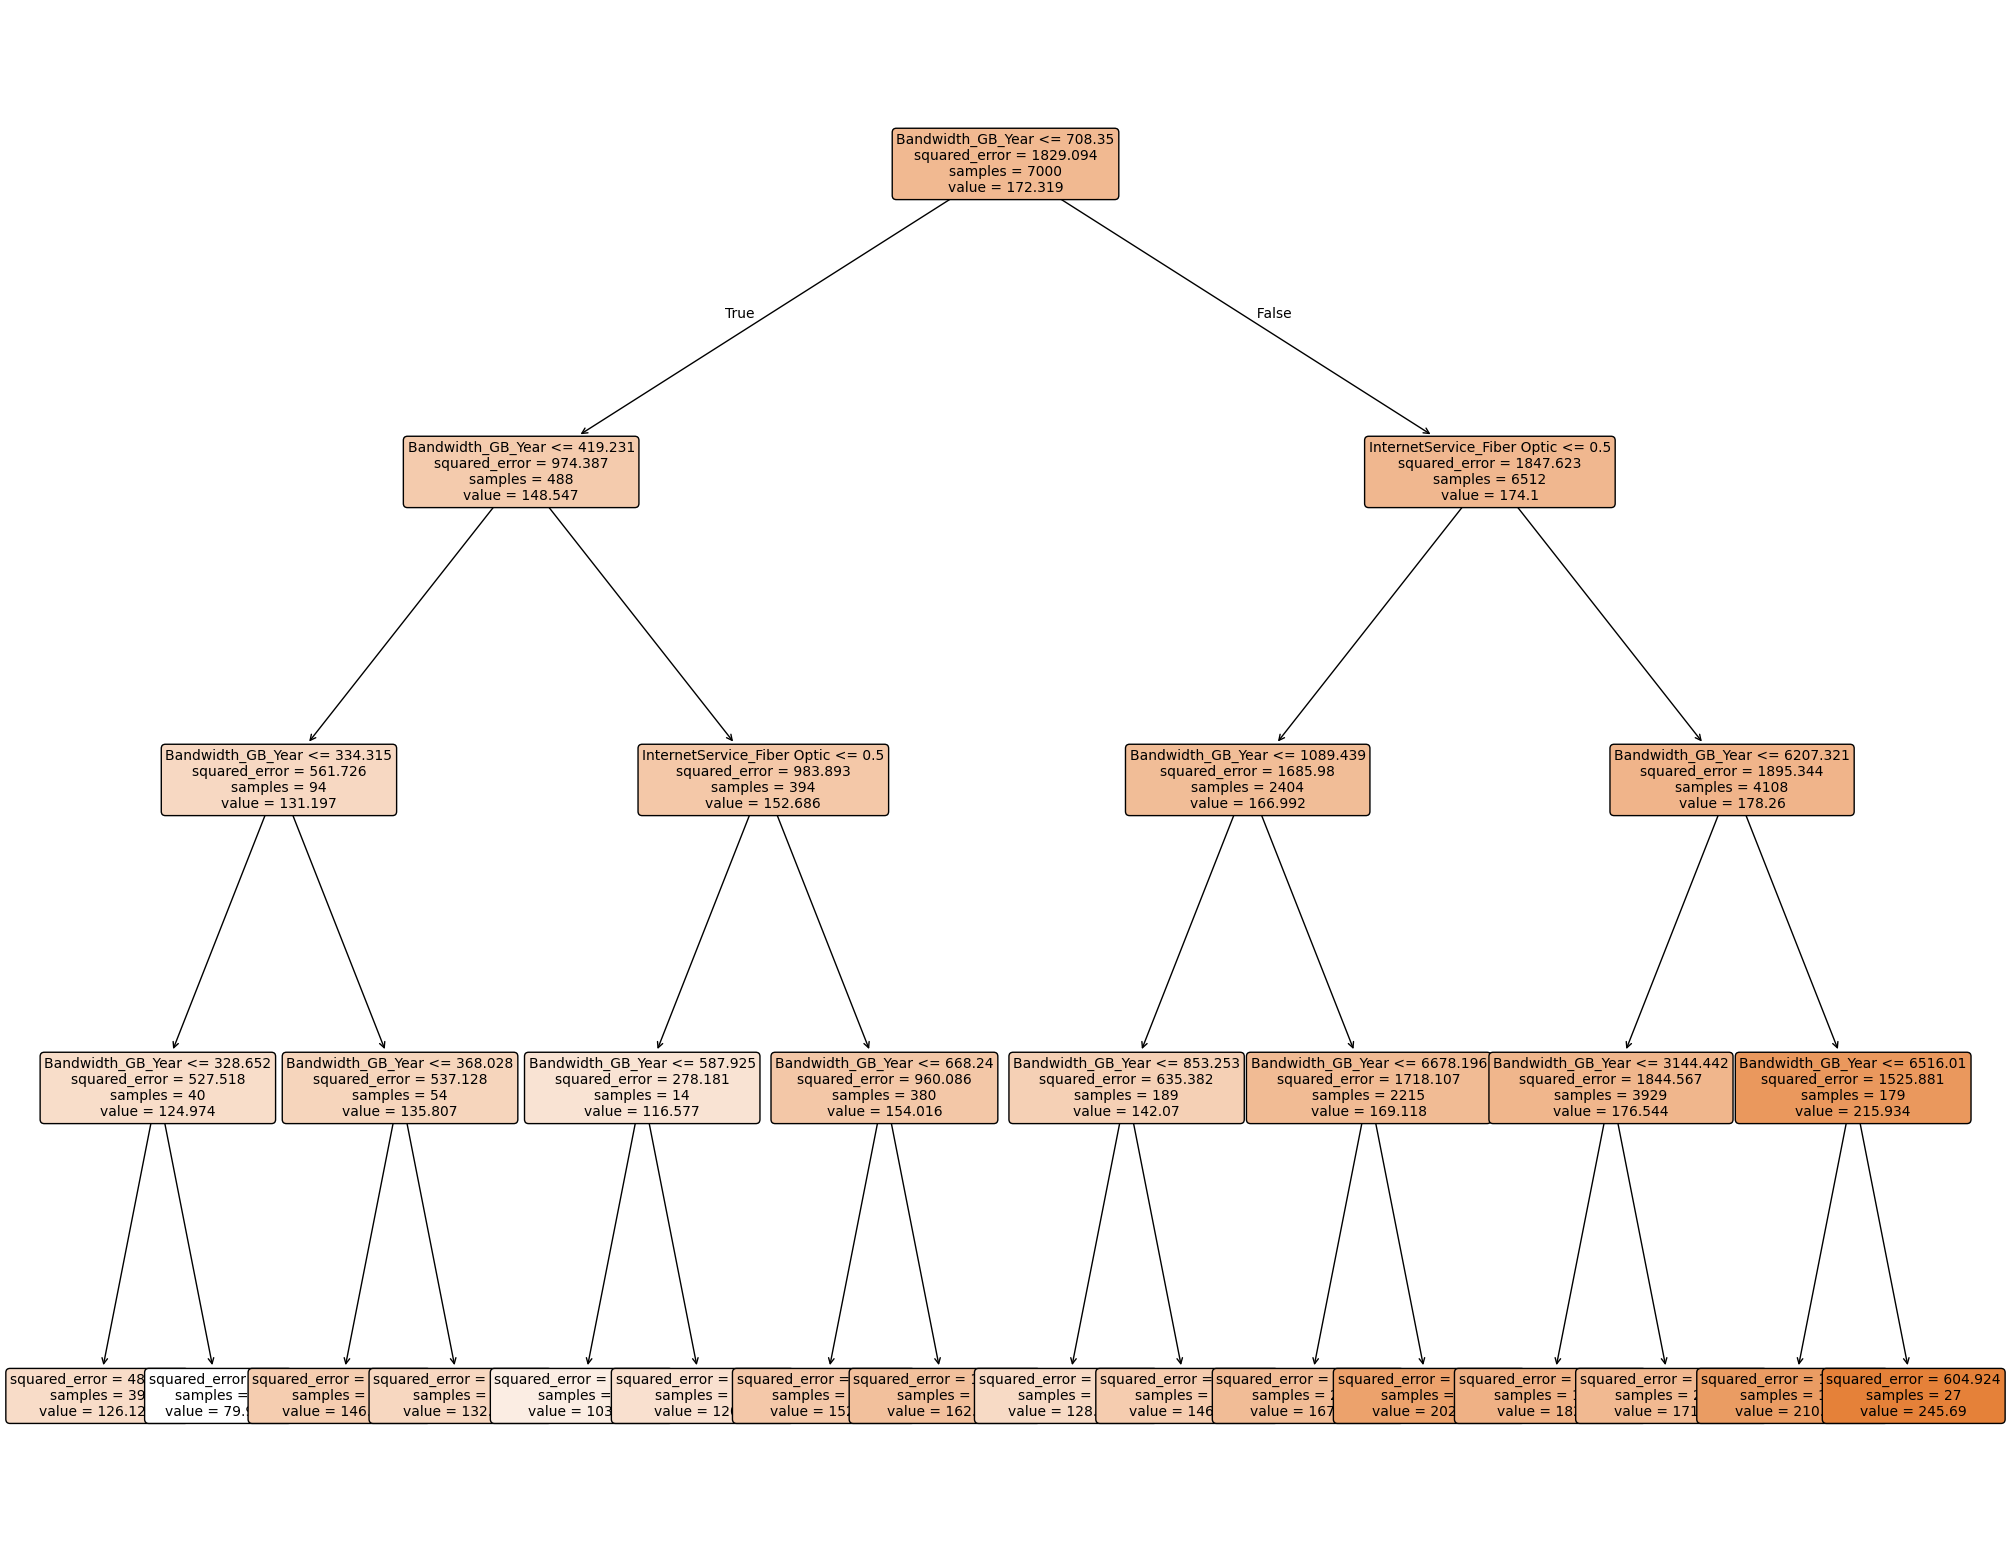

In [162]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regressor_1,
                   feature_names=features,
                   filled=True,
                   rounded=True,
                   fontsize=10
                   )